In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\tc\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_DA_ASEAN = df[(df['job_country'].isin(ASEAN)) & (df['job_title_short'] == 'Data Analyst')].copy()

df_DA_ASEAN = df_DA_ASEAN.dropna(subset='salary_year_avg')

df_DA_ASEAN_exploded = df_DA_ASEAN.explode('job_skills')

df_DA_ASEAN_exploded[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
3457,100500.0,python
3457,100500.0,sql
3457,100500.0,numpy
3457,100500.0,pandas
3457,100500.0,zoom
3457,100500.0,slack
7931,51014.0,python
7931,51014.0,r
7931,51014.0,sql
7931,51014.0,tableau


In [4]:
df_DA_skills = df_DA_ASEAN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(ascending=False, by='count')

df_DA_skills = df_DA_skills.rename(columns ={'count': 'skill_counts', 'median': 'median_salary'})

df_DA_posts = len(df_DA_ASEAN) #alternatives: df_DA_ASEAN['job_title'].count()

df_DA_skills['skill_percent'] = df_DA_skills['skill_counts']/df_DA_posts*100

df_DA_skills = df_DA_skills[df_DA_skills['skill_counts'] > 0]

df_DA_skills

,skill_counts,median_salary,skill_percent
job_skills,,,
sql,62,99500.0,61.386139
python,42,99500.0,41.584158
tableau,36,100500.0,35.643564
excel,34,100500.0,33.663366
r,24,98500.0,23.762376
power bi,23,98500.0,22.772277
spark,8,130414.0,7.920792
word,8,89850.0,7.920792
sql server,8,87025.0,7.920792


In [5]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_counts'] > skill_limit]

df_DA_skills_high_demand.iloc[1]

skill_counts        42.000000
median_salary    99500.000000
skill_percent       41.584158
Name: python, dtype: float64

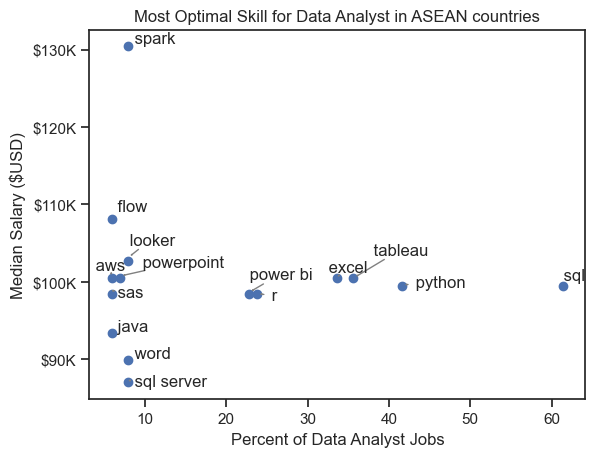

In [12]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skill for Data Analyst in ASEAN countries')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
seen_x = {}  # Dictionary to track x value offsets
seen_y = {}  # Dictionary to track y value offsets
for i, text in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]

    # Initialize offsets for x and y
    offset_x = 0
    offset_y = 0

    # Check if the x value has been seen before and update offset for x
    if x in seen_x:
        offset_x = seen_x[x] * 125  # Increment the offset for duplicates in x
        seen_x[x] += 1            # Increment the counter for this x value
    else:
        seen_x[x] = 1              # Initialize counter for new x value
    
    # Check if the y value has been seen before and update offset for y
    if y in seen_y:
        offset_y = seen_y[y] * 125 # Increment the offset for duplicates in y
        seen_y[y] += 1            # Increment the counter for this y value
    else:
        seen_y[y] = 1              # Initialize counter for new y value
    # Combine both offsets (if both x and y are duplicates, both offsets will apply)
    
    offset = offset_x + offset_y
    texts.append(plt.text(x, y + offset," " + text))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()

In [7]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['power bi',
  'sharepoint',
  'powerbi',
  'spss',
  'looker',
  'msaccess',
  'datarobot',
  'visio',
  'ssrs',
  'ms access',
  'cognos',
  'splunk',
  'ssis',
  'alteryx',
  'qlik',
  'excel',
  'microstrategy',
  'esquisse',
  'sap',
  'spreadsheet',
  'sas',
  'word',
  'nuix',
  'outlook',
  'dax',
  'powerpoint',
  'sheets',
  'tableau'],
 'programming': ['vb.net',
  'clojure',
  'sass',
  'mongo',
  'visual basic',
  'powershell',
  'nosql',
  'typescript',
  'go',
  'apl',
  'groovy',
  'pascal',
  'cobol',
  'rust',
  'assembly',
  'erlang',
  'f#',
  'haskell',
  'lua',
  'solidity',
  'golang',
  'dart',
  'bash',
  'objective-c',
  'css',
  'vba',
  'ocaml',
  'visualbasic',
  'elixir',
  'html',
  'kotlin',
  'delphi',
  'c',
  'julia',
  'c#',
  'javascript',
  'sas',
  'ruby',
  'crystal',
  'python',
  'no-sql',
  'r',
  'java',
  'c++',
  'scala',
  'swift',
  'matlab',
  'mongodb',
  't-sql',
  'lisp',
  'perl',
  'sql',
  'shell',
  'php',
  'fort

In [8]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,sharepoint
0,analyst_tools,powerbi
0,analyst_tools,spss
0,analyst_tools,looker
...,...,...
9,sync,webex
9,sync,zoom
9,sync,slack
9,sync,microsoft teams


In [9]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_counts,median_salary,skill_percent,technology,skills
0,62,99500.0,61.386139,programming,sql
1,42,99500.0,41.584158,programming,python
2,36,100500.0,35.643564,analyst_tools,tableau
3,34,100500.0,33.663366,analyst_tools,excel
4,24,98500.0,23.762376,programming,r
5,23,98500.0,22.772277,analyst_tools,power bi
6,8,130414.0,7.920792,libraries,spark
7,8,89850.0,7.920792,analyst_tools,word
8,8,87025.0,7.920792,databases,sql server
9,8,102750.0,7.920792,analyst_tools,looker


In [10]:
df_DA_skillstech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_counts'] > skill_limit]



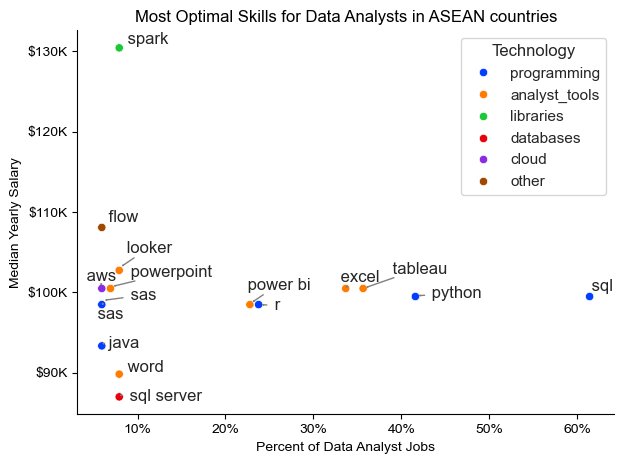

In [11]:
sns.scatterplot(
    data=df_DA_skillstech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    palette='bright',
    legend='full'
    )
sns.despine()
sns.set_theme(style='ticks')

plt.title('Most Optimal Skills for Data Analysts in ASEAN countries')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.legend(title='Technology')

texts = []
repet_x = {}
repet_y = {}
for i, txt in enumerate(df_DA_skillstech_high_demand['skills']):
    x = df_DA_skillstech_high_demand['skill_percent'].iloc[i]
    y = df_DA_skillstech_high_demand['median_salary'].iloc[i]
    x_offset = 0
    y_offset = 0
    
    if x in repet_x:
        x_offset = repet_x[x] * 100
        repet_x[x] += 1
    else:
        repet_x[x] = 1
    
    if y in repet_y:
        y_offset = repet_y[y] * 100
        repet_y[y] += 1
    else:
        repet_y[y] = 1
    
    offset = x_offset + y_offset
    texts.append(plt.text(x, y + offset, " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()